In [44]:
import tensorflow as tf
import numpy as np

tf.enable_eager_execution()
tf.__version__

'1.13.1'

In [45]:
hello = tf.constant('Hello, TensorFlow!')
print(hello)

tf.Tensor(b'Hello, TensorFlow!', shape=(), dtype=string)


In [3]:
a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a, b)

In [4]:
print('a:', a, '\tb:', b, '\tc:', c)

a: tf.Tensor(10, shape=(), dtype=int32) 	b: tf.Tensor(32, shape=(), dtype=int32) 	c: tf.Tensor(42, shape=(), dtype=int32)


In [5]:
matrix1 = tf.constant([[5, 6], [7, 8]])
matrix2 = tf.constant([[1, 2], [3, 4]])

result01 = tf.matmul(matrix1, matrix2)
print('result01:', result01)

result01: tf.Tensor(
[[23 34]
 [31 46]], shape=(2, 2), dtype=int32)


In [6]:
matrix1 + matrix2

<tf.Tensor: id=12, shape=(2, 2), dtype=int32, numpy=
array([[ 6,  8],
       [10, 12]])>

In [7]:
X = [[1., 2., 3.], [4., 5., 6.]]

In [8]:
# tf.Variable: gradient descent algorithm을 적용해 오차가 가장 작은 값들을 찾아가야할 변수들
# 이것들이 바로 신경망을 좌우하는 값들이다.

# tf.random_normal: 각 변수들의 초기값을 정규분포 랜덤 값으로 초기화
# tf.random_normal([행,열]): 입력한 행, 열 개의 난수를 생성
# 난수는 정규 분포를 따르고 평균0 표준편차1

W = tf.Variable(tf.random_normal([3,2]))
b = tf.Variable(tf.random_normal([2,1]))

In [9]:
print("===X===")
print(X)

===X===
[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]


In [10]:
print("===W===")
print(W)

===W===
<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.8020067 ,  0.28617343],
       [-0.13159648,  0.556539  ],
       [ 0.02205149,  0.00603438]], dtype=float32)>


In [11]:
print("===b===")
print(b)

===b===
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-2.4458296],
       [-0.226065 ]], dtype=float32)>


In [12]:
matrix_calc = tf.matmul(X, W) + b

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
print("===행렬 계산 결과===")
print(matrix_calc)

===행렬 계산 결과===
tf.Tensor(
[[-3.4448748 -1.028475 ]
 [-3.9597652  3.73753  ]], shape=(2, 2), dtype=float32)


## p.59

In [35]:
X = [1, 2, 3]
Y = [3, 5, 7]

# tf.random.normal(shape, mean=0.0, stddev=1.0, dtype=tf.dtypes.float32, seed=None, name=None)

W = tf.Variable(tf.random_normal([1], 0., 1.))  # 1개 데이터 저장된 배열, 난수 평균 0, 난수 sd 1
b = tf.Variable(tf.random_normal([1], 0., 1.))

print(W.numpy()[0])
print(b.numpy()[0])

-0.072587855
1.3000432


In [28]:
learning_rate = 0.01

for i in range(3000):
    with tf.GradientTape() as tape:
        hypothesis = W * X + b
        cost = tf.reduce_mean(tf.square(hypothesis - Y))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(W_grad*learning_rate)
    b.assign_sub(b_grad*learning_rate)
    if i % 10 == 0:
        print("i={:}\tW={:.4f}\tb={:.4f}\tcost={:.20f}".format(i, W.numpy()[0], b.numpy()[0], cost))

i=0	W=1.6479	b=0.2437	cost=2.79365849494934082031
i=10	W=2.0394	b=0.4302	cost=0.29741114377975463867
i=20	W=2.1566	b=0.4957	cost=0.05824487283825874329
i=30	W=2.1894	b=0.5237	cost=0.03406510129570960999
i=40	W=2.1961	b=0.5400	cost=0.03042243421077728271
i=50	W=2.1949	b=0.5525	cost=0.02879833243787288666
i=60	W=2.1914	b=0.5636	cost=0.02742639183998107910
i=70	W=2.1872	b=0.5741	cost=0.02613566257059574127
i=80	W=2.1828	b=0.5843	cost=0.02490719594061374664
i=90	W=2.1785	b=0.5942	cost=0.02373667247593402863
i=100	W=2.1743	b=0.6039	cost=0.02262112312018871307
i=110	W=2.1701	b=0.6133	cost=0.02155801095068454742
i=120	W=2.1661	b=0.6225	cost=0.02054486423730850220
i=130	W=2.1621	b=0.6315	cost=0.01957928203046321869
i=140	W=2.1583	b=0.6402	cost=0.01865916140377521515
i=150	W=2.1545	b=0.6488	cost=0.01778223551809787750
i=160	W=2.1508	b=0.6571	cost=0.01694652624428272247
i=170	W=2.1472	b=0.6653	cost=0.01615008711814880371
i=180	W=2.1437	b=0.6732	cost=0.01539110764861106873
i=190	W=2.1403	b=0.6810

i=1580	W=2.0049	b=0.9888	cost=0.00001821960722736549
i=1590	W=2.0048	b=0.9890	cost=0.00001736480044201016
i=1600	W=2.0047	b=0.9893	cost=0.00001654978041187860
i=1610	W=2.0046	b=0.9895	cost=0.00001577074726810679
i=1620	W=2.0045	b=0.9898	cost=0.00001502909435657784
i=1630	W=2.0044	b=0.9900	cost=0.00001432295994163724
i=1640	W=2.0043	b=0.9903	cost=0.00001365030675515300
i=1650	W=2.0042	b=0.9905	cost=0.00001300823350902647
i=1660	W=2.0041	b=0.9907	cost=0.00001239828725374537
i=1670	W=2.0040	b=0.9909	cost=0.00001181545030704001
i=1680	W=2.0039	b=0.9912	cost=0.00001125880589825101
i=1690	W=2.0038	b=0.9914	cost=0.00001073098246706650
i=1700	W=2.0037	b=0.9916	cost=0.00001022688593366183
i=1710	W=2.0036	b=0.9918	cost=0.00000974570502876304
i=1720	W=2.0035	b=0.9920	cost=0.00000928747249417938
i=1730	W=2.0034	b=0.9922	cost=0.00000885145527718123
i=1740	W=2.0034	b=0.9923	cost=0.00000843625457491726
i=1750	W=2.0033	b=0.9925	cost=0.00000803978309704689
i=1760	W=2.0032	b=0.9927	cost=0.00000766158427

In [36]:
# 원래는 이렇게 tape 코딩함. with가 이것을 자동화해줌.

for i in range(3000):
    tape = tf.GradientTape()
    
    tape.__enter__()           # 계산 시작
    hypothesis = W * X + b
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
    tape.__exit__(float, cost, tf.square)            # 계산 끝
    
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(W_grad*learning_rate)
    b.assign_sub(b_grad*learning_rate)
    if i % 10 == 0:
        print("i={:}\tW={:.4f}\tb={:.4f}\tcost={:.20f}".format(i, W.numpy()[0], b.numpy()[0], cost))

i=0	W=0.1089	b=1.3769	cost=17.64879035949707031250
i=10	W=1.1190	b=1.7925	cost=1.80735445022583007812
i=20	W=1.4377	b=1.9047	cost=0.29298320412635803223
i=30	W=1.5430	b=1.9236	cost=0.14310429990291595459
i=40	W=1.5822	b=1.9141	cost=0.12341884523630142212
i=50	W=1.6009	b=1.8962	cost=0.11638452857732772827
i=60	W=1.6131	b=1.8761	cost=0.11079729348421096802
i=70	W=1.6231	b=1.8556	cost=0.10557910799980163574
i=80	W=1.6324	b=1.8354	cost=0.10061622411012649536
i=90	W=1.6412	b=1.8156	cost=0.09588753432035446167
i=100	W=1.6497	b=1.7962	cost=0.09138118475675582886
i=110	W=1.6581	b=1.7773	cost=0.08708662539720535278
i=120	W=1.6662	b=1.7588	cost=0.08299390226602554321
i=130	W=1.6741	b=1.7407	cost=0.07909342646598815918
i=140	W=1.6819	b=1.7231	cost=0.07537639141082763672
i=150	W=1.6895	b=1.7059	cost=0.07183394581079483032
i=160	W=1.6968	b=1.6891	cost=0.06845811754465103149
i=170	W=1.7041	b=1.6728	cost=0.06524079293012619019
i=180	W=1.7111	b=1.6568	cost=0.06217474862933158875
i=190	W=1.7180	b=1.641

i=1570	W=1.9898	b=1.0231	cost=0.00007722505688434467
i=1580	W=1.9901	b=1.0226	cost=0.00007359609298873693
i=1590	W=1.9903	b=1.0221	cost=0.00007013681170064956
i=1600	W=1.9905	b=1.0215	cost=0.00006683789979433641
i=1610	W=1.9908	b=1.0210	cost=0.00006369907350745052
i=1620	W=1.9910	b=1.0205	cost=0.00006070528979762457
i=1630	W=1.9912	b=1.0200	cost=0.00005785120811196975
i=1640	W=1.9914	b=1.0196	cost=0.00005513088035513647
i=1650	W=1.9916	b=1.0191	cost=0.00005253931158222258
i=1660	W=1.9918	b=1.0186	cost=0.00005007211075280793
i=1670	W=1.9920	b=1.0182	cost=0.00004771825842908584
i=1680	W=1.9922	b=1.0178	cost=0.00004547538628685288
i=1690	W=1.9924	b=1.0173	cost=0.00004333908509579487
i=1700	W=1.9926	b=1.0169	cost=0.00004130249726586044
i=1710	W=1.9927	b=1.0165	cost=0.00003936207576771267
i=1720	W=1.9929	b=1.0161	cost=0.00003751171243493445
i=1730	W=1.9931	b=1.0157	cost=0.00003574763468350284
i=1740	W=1.9932	b=1.0154	cost=0.00003406971882213838
i=1750	W=1.9934	b=1.0150	cost=0.00003246981577

(0, 8)

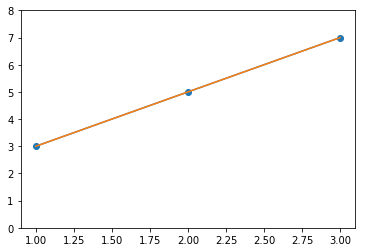

In [42]:
import matplotlib.pyplot as plt

plt.plot(X, Y, marker='o')
plt.plot(X, hypothesis.numpy(), mfc='r', ls='-') # red, 실선
plt.ylim(0,8)

In [43]:
print('X=10일 때 Y 예측:', W*10 + b)
print('X=20일 때 Y 예측:', W*20 + b)

X=10일 때 Y 예측: tf.Tensor([20.997469], shape=(1,), dtype=float32)
X=20일 때 Y 예측: tf.Tensor([40.99419], shape=(1,), dtype=float32)
